# Example notebook to load and filter a raw data in S3

In [1]:
import sys
import os

In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import core.daphmeIO as loader
import core.filters as filters

We load a sample of Gravy trajectory data for the Philadelphia area

In [4]:
filepath = "s3://phl-pings/gravy_clean/date=2019-11-01/"
filepath = '../data/sample3/'
part_path = '../data/sample3/date=2024-01-07/aad4a23f7a90441aa0f55f06e5e4313d-0.parquet'

traj_cols =  {"user_id":"uid",
              "latitude":"latitude",
              "longitude":"longitude",
              "datetime":"datetime",
              "timestamp":"timestamp"}

### Get a sample of users

In [5]:
u_sample = loader.sample_users(part_path, format='parquet', frac_users=0.15, user_id='uid')

### Load data for users in u_sample for 3 days

In [6]:
filepath = ['../data/sample3/date=2024-01-05/',
            '../data/sample3/date=2024-01-06/',
            '../data/sample3/date=2024-01-07/']
data = loader.sample_from_file(filepath, users=u_sample, format='parquet', user_id = 'uid')

### Project coordinates to Web Mercator

In [7]:
data = filters.to_projection(data, latitude='latitude', longitude='longitude')

### Compute the q-statistic for the users in this sample

In [8]:
q_stats = filters.q_stats(data, user_id='uid', timestamp='timestamp')

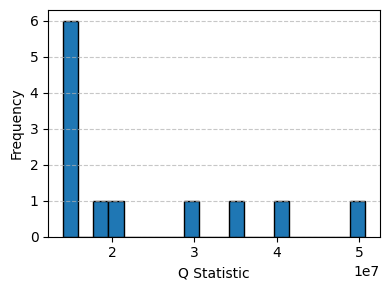

In [9]:
# Plotting the histogram

plt.figure(figsize=(4, 3))
plt.hist(q_stats['q_stat'], bins=20, edgecolor='black')
plt.xlabel('Q Statistic')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()